<a href="https://colab.research.google.com/github/MalithaPrabhashana/patternRecognitionCNN/blob/main/A03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Downloading

In [ ]:
!pip install kaggle
!kaggle datasets download -d joebeachcapital/realwaste

import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import zipfile
import shutil
import os

# Extract dataset
with zipfile.ZipFile("realwaste.zip", "r") as zip_ref:
    zip_ref.extractall(".")

Dataset URL: https://www.kaggle.com/datasets/joebeachcapital/realwaste
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 649M/657M [00:08<00:00, 109MB/s]
100% 657M/657M [00:08<00:00, 77.4MB/s]


# Data Balancing

In [ ]:
# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir("realwaste-main/RealWaste"):
    class_path = os.path.join("realwaste-main/RealWaste", class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

Class: Metal, Number of images: 790
Class: Plastic, Number of images: 921
Class: Miscellaneous Trash, Number of images: 495
Class: Glass, Number of images: 420
Class: Paper, Number of images: 500
Class: Textile Trash, Number of images: 318
Class: Food Organics, Number of images: 411
Class: Vegetation, Number of images: 436
Class: Cardboard, Number of images: 461


In [ ]:
import os
import random
from shutil import move

# Define the dataset path
dataset_path = "realwaste-main/RealWaste"

# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Find the minimum count among all classes
min_count = min(class_image_counts.values())

print(f"Minimum number of images across all classes: {min_count}")

# Loop through each class folder and balance the images
for class_folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_folder)

    if os.path.isdir(class_path):
        # Get all image files in the folder
        images = os.listdir(class_path)
        excess_images = len(images) - min_count

        if excess_images > 0:
            # Randomly select images to remove
            images_to_remove = random.sample(images, excess_images)

            # Move or delete the excess images
            for image in images_to_remove:
                os.remove(os.path.join(class_path, image))
            print(f"Removed {excess_images} images from class '{class_folder}'.")

print("Dataset has been balanced.")


Minimum number of images across all classes: 318
Removed 472 images from class 'Metal'.
Removed 603 images from class 'Plastic'.
Removed 177 images from class 'Miscellaneous Trash'.
Removed 102 images from class 'Glass'.
Removed 182 images from class 'Paper'.
Removed 93 images from class 'Food Organics'.
Removed 118 images from class 'Vegetation'.
Removed 143 images from class 'Cardboard'.
Dataset has been balanced.


In [ ]:
# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir("realwaste-main/RealWaste"):
    class_path = os.path.join("realwaste-main/RealWaste", class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

Class: Metal, Number of images: 318
Class: Plastic, Number of images: 318
Class: Miscellaneous Trash, Number of images: 318
Class: Glass, Number of images: 318
Class: Paper, Number of images: 318
Class: Textile Trash, Number of images: 318
Class: Food Organics, Number of images: 318
Class: Vegetation, Number of images: 318
Class: Cardboard, Number of images: 318


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import shutil
unzipped_dir = "realwaste-main/RealWaste"

# Set paths
dataset_dir = unzipped_dir
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test splits
base_dir = "realwaste-main/SplittedWasteData"
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Create folders for each class in train, val, and test directories
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Split the dataset for each class
for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)
    np.random.shuffle(images)

    # Split images into 60% train, 20% validation, 20% test
    train_images, test_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    # Move images to the respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, class_name, img))

print("Dataset split completed!")

Dataset split completed!


In [ ]:
# Dictionary to store the count of images in each class
class_image_counts = {}

# Loop through each class folder
for class_folder in os.listdir("realwaste-main/SplittedWasteData/train"):
    class_path = os.path.join("realwaste-main/SplittedWasteData/train", class_folder)

    if os.path.isdir(class_path):  # Check if it's a directory
        # Count the number of files in the class folder
        num_images = len(os.listdir(class_path))
        class_image_counts[class_folder] = num_images

# Print the counts for each class
for class_name, count in class_image_counts.items():
    print(f"Class: {class_name}, Number of images: {count}")

Class: Metal, Number of images: 190
Class: Plastic, Number of images: 190
Class: Miscellaneous Trash, Number of images: 190
Class: Glass, Number of images: 190
Class: Paper, Number of images: 190
Class: Textile Trash, Number of images: 190
Class: Food Organics, Number of images: 190
Class: Vegetation, Number of images: 190
Class: Cardboard, Number of images: 190


In [ ]:
def check_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Check if it's a valid image
            except (IOError, SyntaxError):
                print(f"Invalid file: {file_path}")
                os.remove(file_path)  # Remove problematic files

# Check both training and validation directories
check_images(base_dir + "/train")
check_images(base_dir + "/val")

In [ ]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory(base_dir+"/train",
                                          target_size=(150,150),
                                          batch_size=64,
                                          class_mode='categorical')

validation_dataset = validation.flow_from_directory(base_dir+"/val",
                                          target_size=(150,150),
                                          batch_size=64,
                                          class_mode='categorical')

Found 1710 images belonging to 9 classes.
Found 576 images belonging to 9 classes.


In [ ]:
print("Training Dataset: ", train_dataset.samples)
print("Validation Dataset: ", validation_dataset.samples)

Training Dataset:  1710
Validation Dataset:  576


In [ ]:
class_indices = train_dataset.class_indices
print(class_indices)

{'Cardboard': 0, 'Food Organics': 1, 'Glass': 2, 'Metal': 3, 'Miscellaneous Trash': 4, 'Paper': 5, 'Plastic': 6, 'Textile Trash': 7, 'Vegetation': 8}


[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[[[0.68235296 0.7019608  0.6862745 ]
  [0.7019608  0.7176471  0.7137255 ]
  [0.7176471  0.73333335 0.7294118 ]
  ...
  [0.80392164 0.8196079  0.8235295 ]
  [0.7960785  0.8196079  0.8196079 ]
  [0.8078432  0.8235295  0.82745105]]

 [[0.69411767 0.70980394 0.7058824 ]
  [0.7294118  0.74509805 0.7411765 ]
  [0.6509804  0.6666667  0.6627451 ]
  ...
  [0.77647066 0.79215693 0.7960785 ]
  [0.79215693 0.81568635 0.81568635]
  [0.8078432  0.8235295  0.82745105]]

 [[0.65882355 0.6666667  0.6627451 ]
  [0.69411767 0.7019608  0.69803923]
  [0.7058824  0.7137255  0.70980394]
  ...
  [0.78823537 0.80392164 0.8078432 ]
  [0.7686275  0.79215693 0.79215693]
  [0.8078432  0.8235295  0.82745105]]

 ...

 [[0.63529414 0.6431373  0.62352943]
  [0.6156863  0.62352943 0.6039216 ]
  [0.61960787 0.627451   0.60784316]
  ...
  [0.57254905 0.5764706  0.5568628 ]
  [0.61960787 0.62352943 0.6       ]
  [0.58431375 0.5882353  0.5686275 ]]

 [[0.6        0.60784316 0.5882353 ]
  [0.596

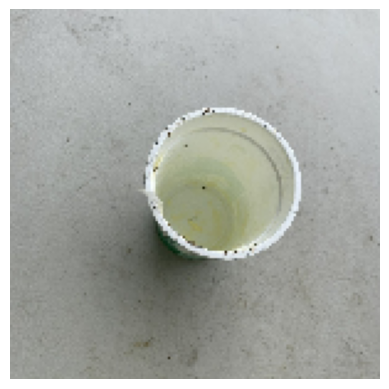

In [ ]:
# Load one batch of images and labels
X_batch, y_batch = next(train_dataset)

# Display the first image from the batch
print(y_batch[0])
print(X_batch[0])

plt.imshow(X_batch[0])
plt.axis('off')
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=9, activation='softmax')
])

In [ ]:
# Compile the model
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.1196 - loss: 2.7019 - val_accuracy: 0.1354 - val_loss: 2.1639
Epoch 2/20
 1/26 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.0781 - loss: 2.1611

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 357ms/step - accuracy: 0.0781 - loss: 2.1611 - val_accuracy: 0.1319 - val_loss: 2.1581
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.1673 - loss: 2.1168 - val_accuracy: 0.3038 - val_loss: 1.9157
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 381ms/step - accuracy: 0.3281 - loss: 1.9095 - val_accuracy: 0.3194 - val_loss: 1.8598
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.2860 - loss: 1.9239 - val_accuracy: 0.3490 - val_loss: 1.7748
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 339ms/step - accuracy: 0.2812 - loss: 1.9374 - val_accuracy: 0.3698 - val_loss: 1.7236
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.3473 - loss: 1.8136 - val_accuracy: 0.4219 - val_loss: 1.6585
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.4062 - loss: 1.6521 - val_accuracy: 0.4253 - val_loss: 1.6282
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.4364 - loss: 1.6201 - val_accuracy: 0.4514 - val_los

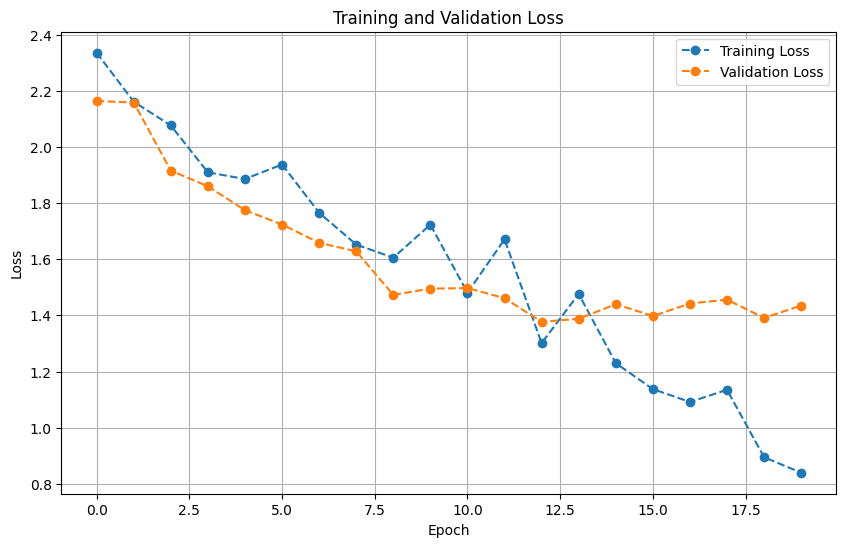

In [ ]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=train_dataset.samples // train_dataset.batch_size,
    validation_data=validation_dataset,
    epochs=20
)

plt.figure(figsize=(10, 6))
plt.plot(model_fit.history['loss'], label='Training Loss', linestyle='--', marker='o')
plt.plot(model_fit.history['val_loss'], label='Validation Loss', linestyle='--', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()